In [35]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [36]:
img_src = glob('../AutoEncoders/img/*.jpg')

In [9]:
img_src

['../AutoEncoders/img\\1.jpg',
 '../AutoEncoders/img\\10.jpg',
 '../AutoEncoders/img\\11.jpg',
 '../AutoEncoders/img\\12.jpg',
 '../AutoEncoders/img\\13.jpg',
 '../AutoEncoders/img\\14.jpg',
 '../AutoEncoders/img\\15.jpg',
 '../AutoEncoders/img\\16.jpg',
 '../AutoEncoders/img\\17.jpg',
 '../AutoEncoders/img\\18.jpg',
 '../AutoEncoders/img\\19.jpg',
 '../AutoEncoders/img\\2.jpg',
 '../AutoEncoders/img\\20.jpg',
 '../AutoEncoders/img\\21.jpg',
 '../AutoEncoders/img\\3.jpg',
 '../AutoEncoders/img\\4.jpg',
 '../AutoEncoders/img\\5.jpg',
 '../AutoEncoders/img\\6.jpg',
 '../AutoEncoders/img\\7.jpg',
 '../AutoEncoders/img\\8.jpg',
 '../AutoEncoders/img\\9.jpg']

In [10]:
img_mpl = plt.imread(img_src[13])
img_cv2 = cv2.imread(img_src[13])
img_mpl.shape, img_cv2.shape

((1080, 1920, 3), (1080, 1920, 3))

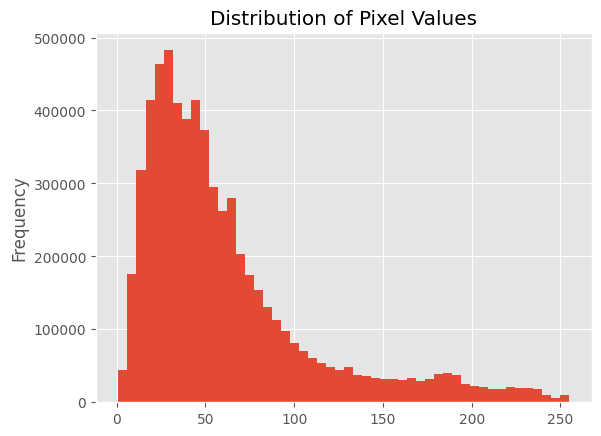

In [11]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

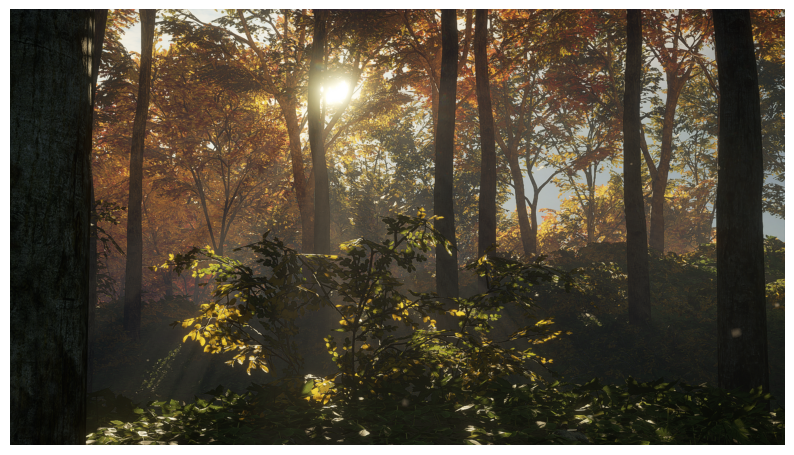

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

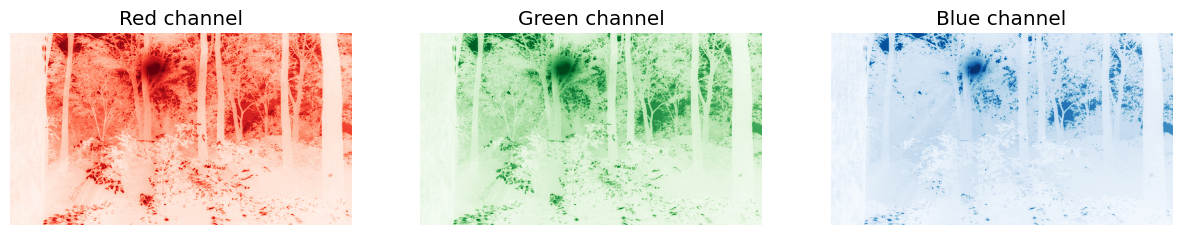

In [13]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

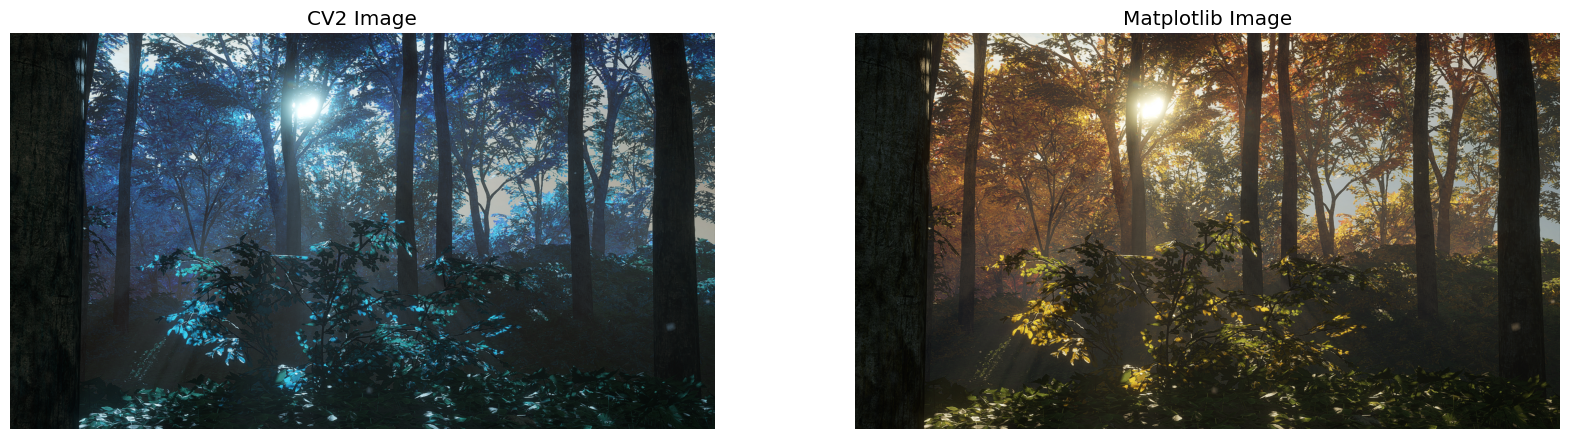

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

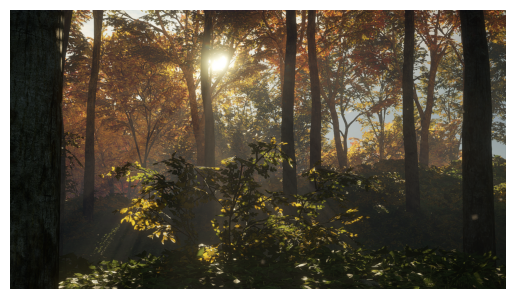

In [25]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

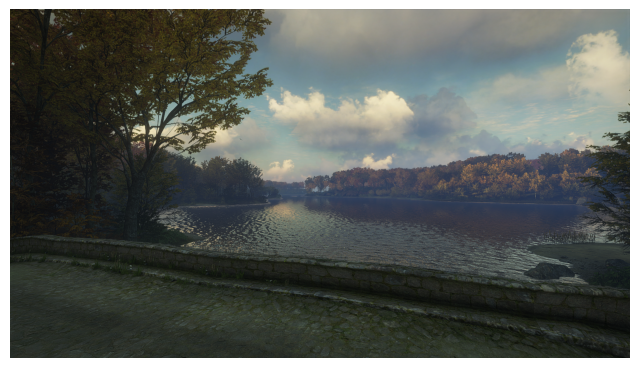

In [29]:
img = plt.imread(img_src[8])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

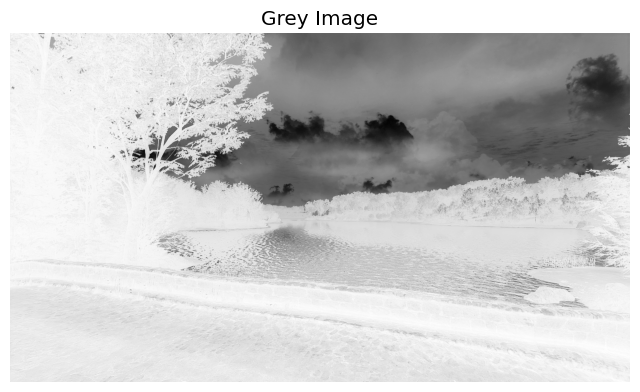

In [30]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

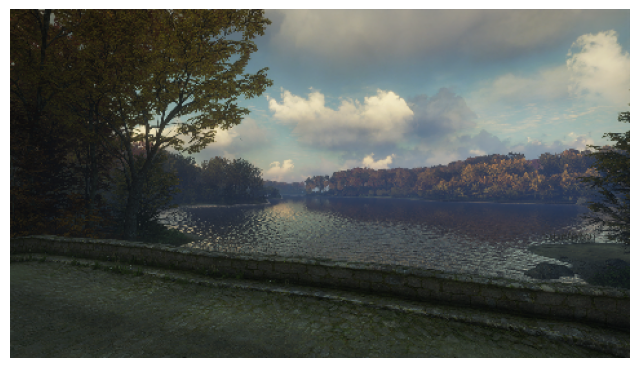

In [31]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

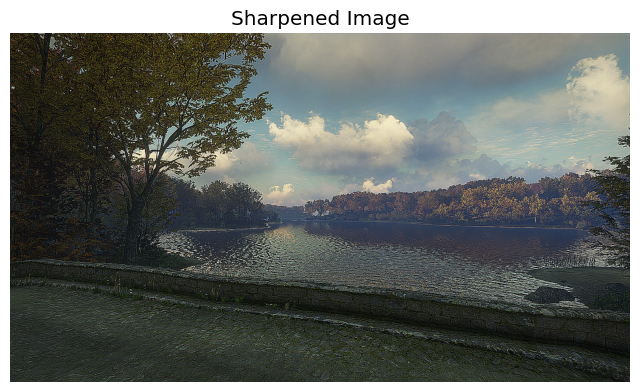

In [33]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

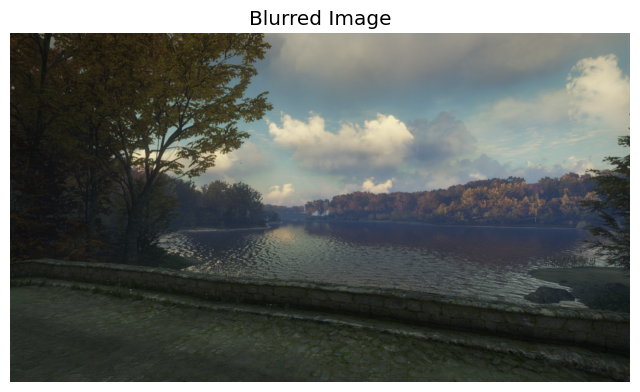

In [34]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img
from keras.utils import load_img, img_to_array

from glob import glob
from tqdm import tqdm
import warnings;

In [89]:
img_src = glob('../AutoEncoders/img/*.jpg')

In [102]:
img_dim_x = img_dim_y = 100
img_channel = 3

In [103]:
all_images = []

for i in tqdm(img_src):
  img = load_img(i, target_size=(img_dim_x,img_dim_y,img_channel))
  img = img_to_array(img)
  img = img/255.
  all_images.append(img)

100%|██████████| 21/21 [00:00<00:00, 118.65it/s]


In [104]:
# for img in all_images:
#     fig, ax = plt.subplots(figsize=(10, 10))
#     ax.imshow(img)
#     ax.axis('off')
#     plt.show()

In [105]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, val_x = train_test_split(all_images,test_size=0.3,random_state=8398)

In [106]:
# function to reduce image resolution while keeping the image size constant

def pixalate_image(image, scale_percent = 100):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return low_res_image

In [107]:
# get low resolution images for the training set
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [108]:
Input_img = Input(shape=(img_dim_x, img_dim_y, img_channel))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [109]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 256)     7168      
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 64)        73792     
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 64)        36928     
                                                           

In [110]:

# early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px, train_x,
            epochs=100,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x_px, val_x))
            # callbacks=[early_stopper])

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.1091 - val_loss: 0.0512
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.0474 - val_loss: 0.2998
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.2727 - val_loss: 0.0198
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.0168 - val_loss: 0.0667
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.0615 - val_loss: 0.0864
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.0801 - val_loss: 0.0905
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.0838 - val_loss: 0.0867
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.0801 - val_loss: 0.0757
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.0696 - val_loss: 0.0564
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.0511 - val_loss: 0.0292
Epoch 11/100
1/1 [=====================

In [111]:
val_x_px_test = val_x_px[5:7]

In [112]:
predictions = autoencoder.predict(val_x_px_test)

1/1 [==============================] - 0s 143ms/step


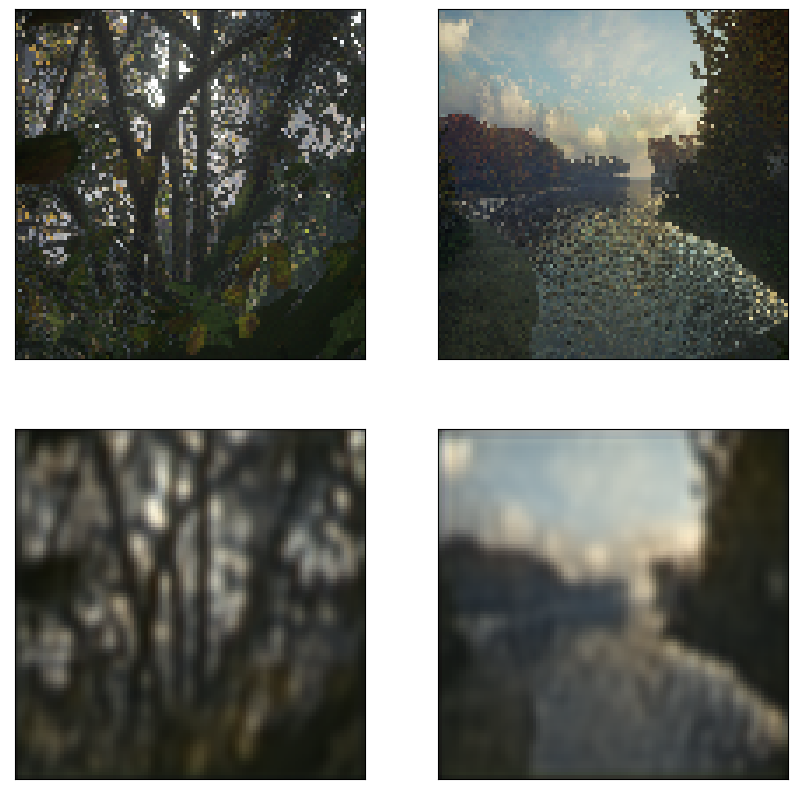

In [113]:
n = len(val_x_px_test)
plt.figure(figsize= (10,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x_px_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()